<a href="https://colab.research.google.com/github/leonardo99i/Inteligencia_Artificial/blob/main/Projeto_A3_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🟩 Projeto A3 de Inteligência Artificial**
> # **Sobre o Notebook** 
* Realizado pelos integrantes do grupo:
  * Leonardo Ribeiro; RA: 125111359610
  * João Souza; RA: 125111350031
  * João Vitor; RA: 125111360331
* O notebook tem por objetivo apresentar a aplicação de um Algortimo Fuzzy em um Dataset da escolha do grupo
* O Dataset utilizado:
* Link para o Dataset: [Dataset de Potabilidade da Água](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

> # **Sobre o Problema:**
* O problema a ser resolvido e desenvolvido terá enfoque em qualificar e determinar a potabilidade da água de uma determinada região.
* Com esse algoritmo será possível determinar se a água de rios, lagos e outras regiões possui ou não uma boa potabilidade. Qualificando a potabilidade da água em "não potável", "semi potável" e "potável".

In [ ]:
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 3.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e2fe6bdc150b8194905ba9e8eeedd42bd800fa1374b7c2c4ea30506291070706
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


# **Sistema Fuzzy + Potabilidade da Água**
> Sistemas são desenvolvidos para resolver problemas. O projeto do Sistema Fuzzy será organizado conforme as três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação

# **Informações sobre cada item:**
>1.   **pH**: É o indicador da condição ácida, neutra ou alcalina do estado da água
2.   **Hardness**: Quantidade de bicarbonatos, carbonatos, sulfatos ou cloretos de cálcio e magnésio dissolvidos nela;
3.   **Solids**: Toda matéria que permanece como resíduo, após evaporação, secagem ou calcinação da amostra;
4. **Chloramines**: Combinação do cloro com materiais orgânicos e ambientais, como urina, suor, protetor solar, entre outros;
5. **Sulfate**: Ânion muito comum na natureza, estando presente em águas naturais em concentrações muito variáveis;
6. **Conductivity**: Fluxo de elétrons na água;
7. **Organic_Carbon**: Uma medida da quantidade de compostos orgânicos contidos numa amostra de água;
8. **Trihalomethanes**: Um grupo de compostos orgânicos que se consideram derivados do metano (CH4);
9. **Turbidity**: É a medição da resistência da água à passagem de luz;
10. **Potability**: Indica se a água é segura para consumo humano.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IA/water_potability.csv')
df.drop('Sulfate', axis = 1, inplace = True)
df.drop('Organic_carbon', axis = 1, inplace = True)
df.drop('Trihalomethanes', axis = 1, inplace = True)
df.drop('Conductivity', axis = 1, inplace = True)
df

,ph,Hardness,Solids,Chloramines,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,4.075075,0
...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,4.708658,1


# **Fuzzificação**
> Etapa na qual as variáveis linguísticas são definidas de forma subjetiva, bem como as funções membro (funções de pertinência)

> Engloba:
* Análise do Problema
* Definição das Variáveis
* Definição das Funções de pertinência
* Criação das Regiões

> Na definição das funções de pertinência para cada variável, diversos tipos de espaço podem ser gerados:
* Triangular, Trapezoidal, Gaussiana, ...

* Variáveis de Entrada:
  * pH:
    * Universo (intervalo de valores): [0, 14]
    * Conjuntos Fuzzy/Funções de Pertinência: ácido, neutro, alcalino
  * Cloramina:
    * Universo (intervalo de valores): [0, 40]
    * Conjuntos Fuzzy/Funções de Pertinência: baixa, média, alta
  * Turbidez:
    * Universo (intervalo de valores): [0, 40]
    * Conjuntos Fuzzy/Funções de Pertinência: transparente, turvo, muito turvo
* Variáveis de Saída:
  * Potabilidade:
    * Universo (intervalo de valores): [0, 60]
    * Conjuntos Fuzzy/Funções de Pertinência: não potável, semi potável, potável


In [ ]:
# importação de bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

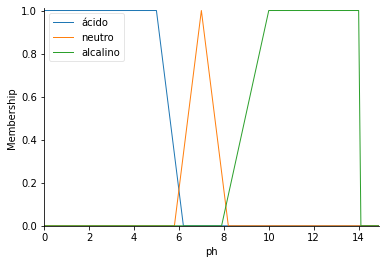

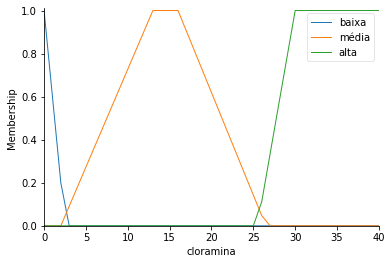

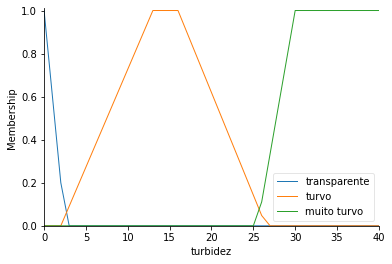

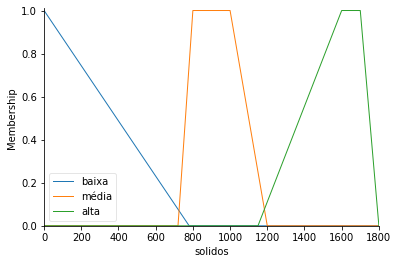

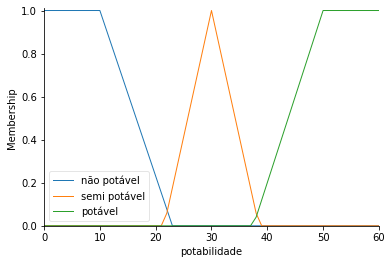

In [ ]:
# [2] Fuzzificação
# Criando as variáveis do problema
ph = ctrl.Antecedent(np.arange(0, 15, 0.1), 'ph')
cloramina = ctrl.Antecedent(np.arange(0, 41, 1), 'cloramina')
turbidez = ctrl.Antecedent(np.arange(0, 41, 1), 'turbidez')
solidos = ctrl.Antecedent(np.arange(0, 1801, 1), 'solidos')
potabilidade = ctrl.Consequent(np.arange(0, 61, 1), 'potabilidade')

# Criando as funções de pertinência para a ph
ph['ácido'] = fuzz.trapmf(ph.universe, [0, 0, 5, 6.2])
ph['neutro'] = fuzz.trimf(ph.universe, [5.8, 7, 8.2])
ph['alcalino'] = fuzz.trapmf(ph.universe, [7.9, 10, 14, 14])

# Criando as funções de pertinência para a cloramina
cloramina['baixa'] = fuzz.trimf(cloramina.universe, [0, 0, 2.5])
cloramina['média'] = fuzz.trapmf(cloramina.universe, [2, 13, 16, 26.5])
cloramina['alta'] = fuzz.trapmf(cloramina.universe, [25.5, 30, 40, 40])

# Criando as funções de pertinência para a turbidez
turbidez['transparente'] = fuzz.trimf(turbidez.universe, [0, 0, 2.5])
turbidez['turvo'] = fuzz.trapmf(turbidez.universe, [2, 13, 16, 26.5])
turbidez['muito turvo'] = fuzz.trapmf(turbidez.universe, [25.5, 30, 40, 40])

# Criando as funções de pertinência para a sólidos totais
solidos['baixa'] = fuzz.trimf(solidos.universe, [0, 0, 780])
solidos['média'] = fuzz.trapmf(solidos.universe, [720, 800, 1000, 1200])
solidos['alta'] = fuzz.trapmf(solidos.universe, [1150, 1600, 1700, 1800])

# Criando as funções de pertinência para potabilidade
potabilidade['não potável'] = fuzz.trapmf(potabilidade.universe, [0, 0, 10, 23])
potabilidade['semi potável'] = fuzz.trimf(potabilidade.universe, [21.5, 30, 38.5])
potabilidade['potável'] = fuzz.trapmf(potabilidade.universe, [37.5, 50, 60, 60])

# Visualizando as funções de pertinência para cada variável
ph.view()
cloramina.view()
turbidez.view()
solidos.view()
potabilidade.view()

# **Inferência Fuzzy**
> Etapa na qual as proposições (regras) são definidas e depois são examinadas
paralelamente.

> Engloba:
* Definição das proposições
* Análise das regras
* Criação da região resultante

> Definição das Proposições para o Sistema Fuzzy de controle da validade.
* Base de Conhecimento/Regras
  * São muitas regras para serem descritas
  
# **Defuzzificação**
> Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.

Digite o valor de pH: 9
Digite o valor da Cloramina (mg/L): 100
Digite o valor da Turbidez (UNT): 12
Digite o valor dos Sólidos Totais (mg/L): 1800
A potabilidade é de 18/60


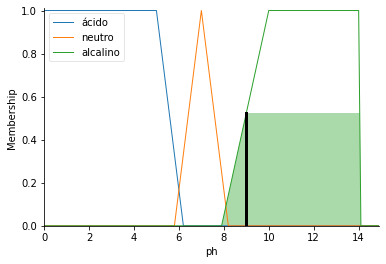

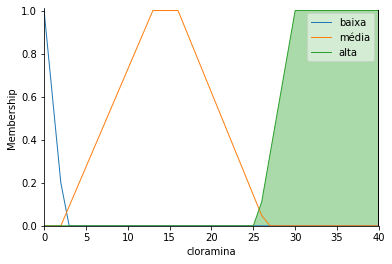

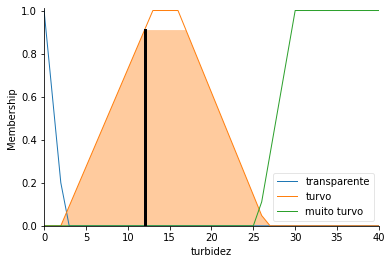

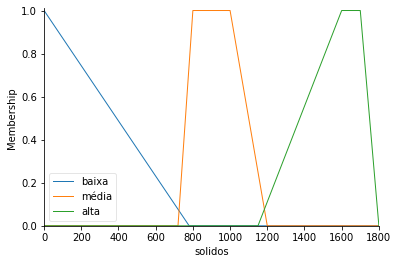

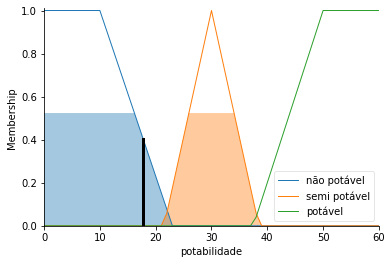

In [ ]:

# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(ph['ácido'], potabilidade['não potável'])
rule2 = ctrl.Rule(ph['ácido'] & cloramina['baixa'], potabilidade['semi potável'])
rule3 = ctrl.Rule(ph['ácido'] & cloramina['média'], potabilidade['semi potável'])
rule4 = ctrl.Rule(ph['ácido'] & cloramina['alta'], potabilidade['não potável'])
rule5 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['transparente'], potabilidade['não potável'])
rule6 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['transparente'], potabilidade['não potável'])
rule7 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['transparente'], potabilidade['não potável'])
rule8 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['turvo'], potabilidade['não potável'])
rule9 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['turvo'], potabilidade['não potável'])
rule10 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['turvo'], potabilidade['não potável'])
rule11 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['muito turvo'], potabilidade['não potável'])
rule12 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['muito turvo'], potabilidade['não potável'])
rule13 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['muito turvo'], potabilidade['não potável'])
rule14 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule15 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule16 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule17 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule18 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule19 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule20 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule21 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule22 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule23 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule24 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule25 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule26 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule27 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule28 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule29 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule30 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule31 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule32 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule33 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule34 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule35 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule36 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule37 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule38 = ctrl.Rule(ph['ácido'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule39 = ctrl.Rule(ph['ácido'] & cloramina['média'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule40 = ctrl.Rule(ph['ácido'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])

rule41 = ctrl.Rule(ph['neutro'], potabilidade['potável'])
rule42 = ctrl.Rule(ph['neutro'] & cloramina['baixa'], potabilidade['potável'])
rule43 = ctrl.Rule(ph['neutro'] & cloramina['média'], potabilidade['semi potável'])
rule44 = ctrl.Rule(ph['neutro'] & cloramina['alta'], potabilidade['não potável'])
rule45 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['transparente'], potabilidade['potável'])
rule46 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['transparente'], potabilidade['semi potável'])
rule47 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['transparente'], potabilidade['não potável'])
rule48 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['turvo'], potabilidade['não potável'])
rule49 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['turvo'], potabilidade['não potável'])
rule50 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['turvo'], potabilidade['não potável'])
rule51 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['muito turvo'], potabilidade['não potável'])
rule52 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['muito turvo'], potabilidade['não potável'])
rule53 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['muito turvo'], potabilidade['não potável'])
rule54 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule55 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule56 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule57 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['transparente'] & solidos['média'], potabilidade['potável'])
rule58 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['transparente'] & solidos['média'], potabilidade['semi potável'])
rule59 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule60 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule61 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule62 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule63 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule64 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule65 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule66 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule67 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule68 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule69 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule70 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule71 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule72 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule73 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule74 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule75 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule76 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule77 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule78 = ctrl.Rule(ph['neutro'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule79 = ctrl.Rule(ph['neutro'] & cloramina['média'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule80 = ctrl.Rule(ph['neutro'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])

rule81 = ctrl.Rule(ph['alcalino'], potabilidade['semi potável'])
rule82 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'], potabilidade['não potável'])
rule83 = ctrl.Rule(ph['alcalino'] & cloramina['média'], potabilidade['não potável'])
rule84 = ctrl.Rule(ph['alcalino'] & cloramina['alta'], potabilidade['não potável'])
rule85 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['transparente'], potabilidade['não potável'])
rule86 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['transparente'], potabilidade['não potável'])
rule87 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['transparente'], potabilidade['não potável'])
rule88 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['turvo'], potabilidade['não potável'])
rule89 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['turvo'], potabilidade['não potável'])
rule90 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['turvo'], potabilidade['não potável'])
rule91 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['muito turvo'], potabilidade['não potável'])
rule92 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['muito turvo'], potabilidade['não potável'])
rule93 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['muito turvo'], potabilidade['não potável'])
rule94 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule95 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule96 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['transparente'] & solidos['baixa'], potabilidade['não potável'])
rule97 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule98 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule99 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['transparente'] & solidos['média'], potabilidade['não potável'])
rule100 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule101 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule102 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['transparente'] & solidos['alta'], potabilidade['não potável'])
rule103 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule104 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule105 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['turvo'] & solidos['baixa'], potabilidade['não potável'])
rule106 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule107 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule108 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['turvo'] & solidos['média'], potabilidade['não potável'])
rule109 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule110 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule111 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['turvo'] & solidos['alta'], potabilidade['não potável'])
rule112 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule113 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule114 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['baixa'], potabilidade['não potável'])
rule115 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule116 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule117 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['média'], potabilidade['não potável'])
rule118 = ctrl.Rule(ph['alcalino'] & cloramina['baixa'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule119 = ctrl.Rule(ph['alcalino'] & cloramina['média'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])
rule120 = ctrl.Rule(ph['alcalino'] & cloramina['alta'] & turbidez['muito turvo'] & solidos['alta'], potabilidade['não potável'])

# Sistema Fuzzy e Simulação
potabilidade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39,
                                        rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77, 
                                        rule78, rule79, rule80, rule81, rule82, rule83, rule84, rule85, rule86, rule87, rule88, rule89, rule90, rule91, rule92, rule93, rule94, rule95, rule96, rule97, rule98, rule99, rule100, rule101, rule102, rule103, rule104, rule105, rule106, rule107, rule108, rule109, rule110, rule111, rule112, rule113,
                                        rule114, rule115, rule116, rule117, rule118, rule119, rule120])
potabilidade_simulador = ctrl.ControlSystemSimulation(potabilidade_ctrl)

# Entranda da pH
while True:
  pH = float(input('Digite o valor de pH: '))
  if(pH<0 or pH >14):
    print('O pH deve estar no intervalo [0, 14]')
    continue
  potabilidade_simulador.input['ph'] = pH
  break

# Entrada da cloramina  
while True:
  cl = float(input('Digite o valor da Cloramina (mg/L): '))
  if(cl<0 or pH >40):
    print('A Cloramina deve estar no intervalo [0, 40]')
    continue
  potabilidade_simulador.input['cloramina'] = cl
  break

# Entrada da turbidez  
while True:
  tur = float(input('Digite o valor da Turbidez (UNT): '))
  if(tur<0 or pH >40):
    print('A Turbidez deve estar no intervalo [0, 40]')
    continue
  potabilidade_simulador.input['turbidez'] = tur
  break

# Entrada doss sóidos totais  
while True:
  sol = float(input('Digite o valor dos Sólidos Totais (mg/L): '))
  if(sol<0 or pH >1800):
    print('Os Sólidos Totais devem estar no intervalo [0, 1800]')
    continue
  potabilidade_simulador.input['solidos'] = sol
  break


# Computando o resultado (Inferência Fuzzy + Defuzzificação)
potabilidade_simulador.compute()
print('A potabilidade é de %d/60' % round(potabilidade_simulador.output['potabilidade']))

# Visualizando as regiões
ph.view(sim=potabilidade_simulador)
cloramina.view(sim=potabilidade_simulador)
turbidez.view(sim=potabilidade_simulador)
solidos.view(sim=potabilidade_simulador)
potabilidade.view(sim=potabilidade_simulador)
